In [1]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

### A.2 Datos abiertos de la CDMX
#### La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las
#### carpetas de investigación ​ aportados por la PGJ​ . La tabla está disponible aquí:
#### https://datos.cdmx.gob.mx/explore

In [3]:
datos = pd.read_csv('./data/DS/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv', sep=',')

In [5]:
datos.shape

(931007, 18)

In [23]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931007 entries, 0 to 931006
Data columns (total 18 columns):
ao_hechos               930618 non-null float64
mes_hechos              930618 non-null object
fecha_hechos            930694 non-null object
delito                  931007 non-null object
categoria_delito        931007 non-null object
fiscalia                931007 non-null object
agencia                 931007 non-null object
unidad_investigacion    930782 non-null object
alcaldia_hechos         927921 non-null object
colonia_hechos          893950 non-null object
ao_inicio               931007 non-null int64
mes_inicio              931007 non-null object
fecha_inicio            931007 non-null object
calle_hechos            928501 non-null object
calle_hechos2           372675 non-null object
longitud                894722 non-null float64
latitud                 894722 non-null float64
geopoint                894722 non-null object
dtypes: float64(3), int64(1), object(14)


In [17]:
datos.head(2)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2019.0,Julio,2019-07-25 12:00:00,USURPACIÓN DE IDENTIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-3SD,SAN FRANCISCO DEL RINCON,NaN,2019,Septiembre,2019-09-30 15:57:58,JUAN DE ARREOLA,"HECHOS EN SAN FRANCISCO DEL RINCON, GUANAJUATO",NaN,NaN,NaN
1,2019.0,Septiembre,2019-09-30 14:15:00,RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA),DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-5,UI-3CD,IZTAPALAPA,ZONA URBANA EJIDAL SANTA MARIA AZTAHUACAN,2019,Septiembre,2019-09-30 15:59:24,PLAN DE AYALA Y OTILIO MONTAÑO,OTILIO MONTAÑO,-99.031438,19.361161,"19.3611606998,-99.0314382997"


In [5]:
def valores_faltantes(dataset):
    return dataset.isnull().sum(axis=0)

In [6]:
def grafica_barras_nulos(nulos):
    plt.figure(figsize=(10,6))
    plt.xticks(np.arange(len(nulos)), nulos.index, rotation='vertical')
    plt.ylabel('Frecuencia relativa del Total de valores perdidos en el dataset')
    plt.bar(np.arange(len(nulos)), nulos)

In [76]:
nulos = valores_faltantes(datos)# / datos.shape[0]

In [77]:
nulos

ao_hechos                  76
mes_hechos                 76
fecha_hechos                0
delito                      0
categoria_delito            0
fiscalia                    0
agencia                     0
unidad_investigacion      224
alcaldia_hechos          3077
colonia_hechos          37036
ao_inicio                   0
mes_inicio                  0
fecha_inicio                0
calle_hechos             2496
longitud                36264
latitud                 36264
geopoint                36264
Fecha_Hechos                0
dtype: int64

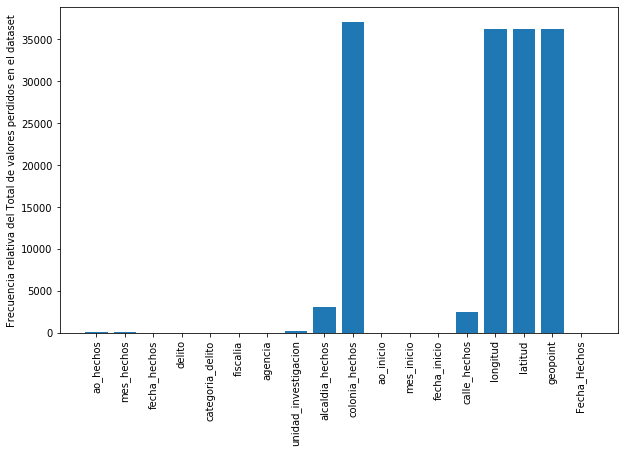

In [78]:
grafica_barras_nulos(nulos)

#### En este caso se observa que los datos contienen valores perdidos para poder realizar los analisis siguientes haremos:
##### - Eliminar la columna calle_hechos2 porque la mayoria de los datos no estan
##### - Dado que el dataset contiene cerca de un millon de registros podemos quirtar los registros que contengan missing values en la columna fecha_hechos ya que la necesitamos y colocar como nan en los demas campos que hay.

In [7]:
#Elimina la columna calle_hechos2
datos = datos.drop(columns=['calle_hechos2'], axis=1)

In [8]:
#Elimina los registros con valores nulos en la fecha_hechos
datos = datos.dropna(subset=['fecha_hechos']) 

In [9]:
# Ademas encontramos otras inconsistencias en la columna fecha_hechos con valores NA NA, NA 00:00:0 y NA 00:00:00
datos['fecha_hechos'][(datos['fecha_hechos'] == 'NA NA') | (datos['fecha_hechos'] == 'NA 00:00:0') | (datos['fecha_hechos'] == 'NA 00:00:00') ] = 'nan'
datos = datos[datos['fecha_hechos'] != 'nan']

In [10]:
def formatoFecha(fecha):
    return pd.to_datetime(fecha, format='%Y-%m-%d %H:%M:%S')

In [11]:
def anioMes(fecha):
    return fecha[:7]

In [12]:
def mes(fecha):
    return fecha[5:7]

In [13]:
def dia(fecha):
    return fecha[8:10]

In [14]:
datos['Fecha_Hechos'] = datos['fecha_hechos'].apply(lambda x: formatoFecha(x))

In [15]:
datos['anioMes'] = datos['fecha_hechos'].apply(lambda x: anioMes(x))

In [16]:
datos['mes'] = datos['fecha_hechos'].apply(lambda x: mes(x))

In [17]:
datos['dia'] = datos['fecha_hechos'].apply(lambda x: dia(x))

### 1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

- a) Primero que nada que la fuente de donde se obtiene la información es confiable
- b) Verificar que no haya valores perdidos (missing values)
- c) Verificar que el tipo de dato de las columnas sea consistente con el nombre (ejemplo edad, que entre los valores no existan valores con punto flotante o cadenas de caracteres)
- d) Si hay columnas que contengan nombres (personas, empresas) o direcciones, verificar que no se tengan duplicados, si el caso lo requiere.
- e) Columnas numericas verificar existencia de outliers
- f) Inconsistencia de codificacion en valores binarios ( H-hombre, M-mujer ) y que existan valores no propios con la columna a menos que se coloque un valor para los missing values (ej. L)

### 2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [10]:
print('Total de registros: {}'.format(datos.shape[0]))

Total de registros: 931007


In [98]:
datos['Fecha_Hechos'].max()

Timestamp('2019-12-31 22:40:00')

In [114]:
ultima_fecha = datos['Fecha_Hechos'].max()
primer_fecha = datos['Fecha_Hechos'].min()
print(primer_fecha)
print(ultima_fecha)
print('El rango de tiempo es de: {} años'.format(ultima_fecha.year - primer_fecha.year))

1906-06-02 19:00:00
2019-12-31 22:40:00
El rango de tiempo es de: 113 años


### 3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [22]:
df = datos[['delito']]

s = df.groupby(df.columns.tolist(), as_index=False).size()
out = s[s > 1].reset_index()
out.rename(columns = {0: 'Num_delitos'}, inplace=True)
por_delito = out.sort_values('Num_delitos', ascending = False)
print('Los delitos mas frecuentes son: ')
por_delito.head(5)

Los delitos mas frecuentes son: 


,delito,Num_delitos
267,VIOLENCIA FAMILIAR,82777
156,ROBO A NEGOCIO SIN VIOLENCIA,60290
219,ROBO DE OBJETOS,58427
74,FRAUDE,53551
201,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,48872


In [129]:
plt.rcParams['figure.figsize'] = [24,10]

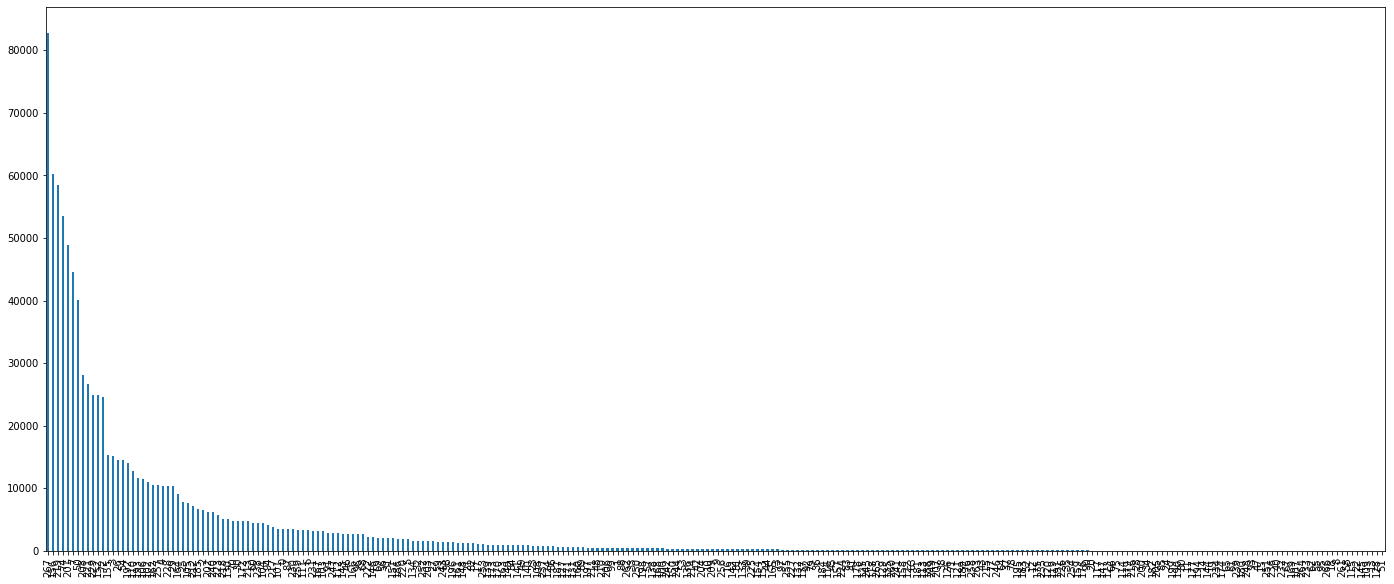

In [130]:
por_delito['Num_delitos'].plot.bar()

### 5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [10]:
import re

In [4]:
alcaldias = pd.read_csv('./data/alcaldias.csv', sep=',')

In [5]:
alcaldias['NOMBRE']

0                    Tlalpan
1        Venustiano Carranza
2               Azcapotzalco
3                 Iztapalapa
4                  Iztacalco
5             Miguel Hidalgo
6     La Magdalena Contreras
7                   Coyoacán
8                 Milpa Alta
9                 Cuauhtémoc
10            Álvaro Obregón
11                Xochimilco
12                   Tláhuac
13             Benito Juárez
14     Cuajimalpa de Morelos
15         Gustavo A. Madero
Name: NOMBRE, dtype: object

In [6]:
def quita_acentos(cadena):
                             # á    é    í    ó    ú    Á    É    Í    Ó    Ú
    ascii_vocales_acentos = [225, 233, 237, 243, 250, 193, 201, 205, 211, 218]
    ascci_vocales         = [ 97, 101, 105, 111, 117,  65,  69,  73,  79,  85]
    indice = 0

    for letra in cadena:
        if ord(letra) in ascii_vocales_acentos:
            cadena = cadena.replace( chr(ascii_vocales_acentos[ascii_vocales_acentos.index( ord(letra))]) , 
                           chr(ascci_vocales[ascii_vocales_acentos.index( ord(letra))]))
        indice += 1
    return cadena

In [7]:
def limpiaCadena(cadena):
    cadena_limpia = quita_acentos(cadena)
    cadena_limpia = re.sub(r'[.]',r'',cadena_limpia)
    cadena_limpia = re.sub(r'[?|,|$|!|\\/|-|=|´|(|)|:|¿]',r' ',cadena_limpia)
    cadena_limpia = cadena_limpia.strip()
    cadena_limpia = str(cadena_limpia)
    
    return cadena_limpia.upper()

In [8]:
def nombre_alcaldias(alcaldia):
    return limpiaCadena(alcaldia)

In [11]:
alcaldias['alcaldia_hechos'] = alcaldias['NOMBRE'].apply(lambda x: nombre_alcaldias(x))

In [12]:
df_delitos = datos[:]

In [13]:
#solo tomaremos los datos del 2019
df_delitos = df_delitos[df_delitos['ao_hechos'] == 2019]

In [14]:
df_delitos.shape

(231175, 18)

In [15]:
# solo la de CDMX
df_cdmx = alcaldias.merge(df_delitos, indicator = True, how='inner', on='alcaldia_hechos').loc[lambda x : x['_merge'] == 'both']

In [348]:
df = df_cdmx[['alcaldia_hechos']]

s = df.groupby(df.columns.tolist(), as_index=False).size()
out = s[s > 1].reset_index()
out.rename(columns = {0: 'Num_delitosXalcaldia'}, inplace=True)
por_alcaldia = out.sort_values('Num_delitosXalcaldia', ascending = False)

print('Alcaldia con mas delitos: {} con {}'.format(por_alcaldia.head(1).values[0][0], por_alcaldia.head(1).values[0][1]))
print('Alcaldia con menos delitos: {} con {}'.format(por_alcaldia.tail(1).values[0][0], por_alcaldia.tail(1).values[0][1]))

Alcaldia con mas delitos: IZTAPALAPA con 36727
Alcaldia con menos delitos: MILPA ALTA con 1580


In [1]:
#Iztapalapa tiene mas delitos porque contiene el mayor numero de habitantes y 
# milpa Alta por otro lado contiene el menor numero de habitantes. 

### 6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [443]:
a = df_cdmx.groupby(['alcaldia_hechos', 'colonia_hechos'])['delito'].count()

In [444]:
r = a.reset_index()

In [445]:
r1 = r.sort_values(by='delito', ascending=False)

In [446]:
l = []
al = r1['alcaldia_hechos'].unique()
for valor in al:
    l.append(r1[r1['alcaldia_hechos'] == valor].head(3).values)

In [449]:
coloniasMasDelitos = pd.DataFrame(np.concatenate(l))
coloniasMasDelitos = coloniasMasDelitos.rename(columns={0:'alcaldia_hechos', 1:'colonia_hechos', 2:'Num_delitos'})
coloniasMasDelitos

,alcaldia_hechos,colonia_hechos,Num_delitos
0,CUAUHTEMOC,CENTRO,6996
1,CUAUHTEMOC,DOCTORES,3929
2,CUAUHTEMOC,ROMA NORTE,2589
3,BENITO JUAREZ,DEL VALLE CENTRO,3121
4,BENITO JUAREZ,NARVARTE,2288
5,BENITO JUAREZ,PORTALES SUR,1266
6,MIGUEL HIDALGO,POLANCO,1987
7,MIGUEL HIDALGO,ANAHUAC,1096
8,MIGUEL HIDALGO,TACUBAYA,779
9,IZTACALCO,AGRÍCOLA ORIENTAL,1853


### 7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [33]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [21]:
def fecha(anio, mes, dia):
    return str(anio) + '-' + str(mes) + '-' + str(dia)

In [50]:
def Dickey_Fuller_test(datos):
    result = adfuller(datos)
    print('p-value: %f' % result[1])

In [21]:
datos.head(2)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,longitud,latitud,geopoint,Fecha_Hechos,anioMes,mes,dia
0,2019.0,Julio,2019-07-25 12:00:00,USURPACIÓN DE IDENTIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-3SD,SAN FRANCISCO DEL RINCON,NaN,2019,Septiembre,2019-09-30 15:57:58,JUAN DE ARREOLA,NaN,NaN,NaN,2019-07-25 12:00:00,2019-07,07,25
1,2019.0,Septiembre,2019-09-30 14:15:00,RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA),DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-5,UI-3CD,IZTAPALAPA,ZONA URBANA EJIDAL SANTA MARIA AZTAHUACAN,2019,Septiembre,2019-09-30 15:59:24,PLAN DE AYALA Y OTILIO MONTAÑO,-99.031438,19.361161,"19.3611606998,-99.0314382997",2019-09-30 14:15:00,2019-09,09,30


In [18]:
tendencia_df = datos[['ao_hechos','mes','dia', 'delito', 'Fecha_Hechos']]

In [19]:
tendencia_df = tendencia_df[tendencia_df['ao_hechos'] > 2015]

In [20]:
tendencia_df['ao_hechos'] = tendencia_df['ao_hechos'].astype(int)

In [22]:
tendencia_df['fecha'] = tendencia_df.apply(lambda x: fecha(x['ao_hechos'], x['mes'], x['dia']), axis=1)

In [38]:
tendencia_tiempo = tendencia_df.set_index(tendencia_df.Fecha_Hechos)

###  Dickey Fuller test
#### H0: No es estacionaria
#### H1: Es estacionaria

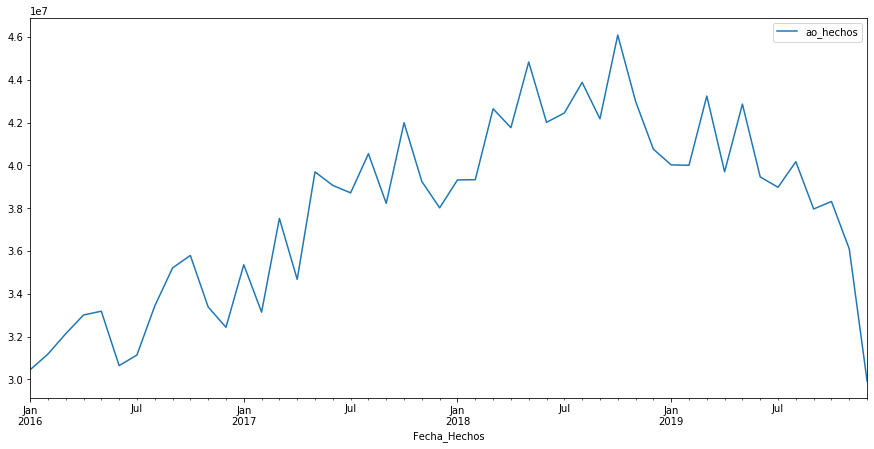

In [53]:
mensual = tendencia_tiempo.resample('M').sum()
fig, ax = plt.subplots(figsize=(15,7))
mensual.plot(ax=ax)

In [58]:
Dickey_Fuller_test(mensual)

p-value: 0.577236


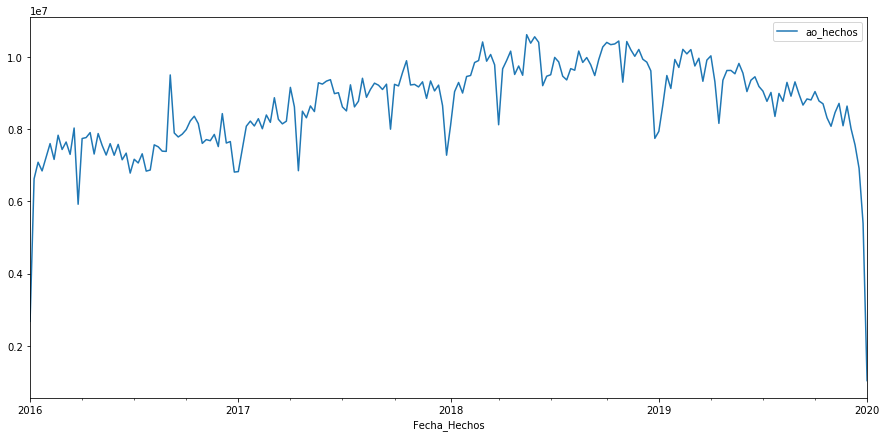

In [43]:
semanal = tendencia_tiempo.resample('W').sum()
fig, ax = plt.subplots(figsize=(15,7))
semanal.plot(ax=ax)

In [59]:
Dickey_Fuller_test(semanal)

p-value: 0.611793


p-value: 0.315177


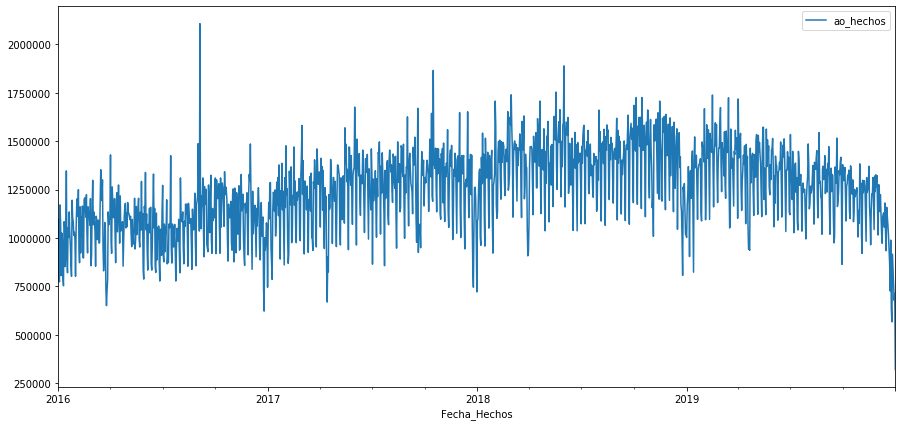

In [57]:
diario = tendencia_tiempo.resample('D').sum()
fig, ax = plt.subplots(figsize=(15,7))
diario.plot(ax=ax)

In [56]:
Dickey_Fuller_test(diario)

p-value: 0.315177


#### Como p > 0.05 significa que no rechazamos H0 por lo tanto la serie de tiempo NO ES ESTACIONARIA, mensualmente, semanalmente ni diariamente

### 8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [537]:
delitosXalcaldia = df_cdmx.groupby(['alcaldia_hechos', 'delito'])['NOMBRE'].count()

In [538]:
delitosXalcaldia

alcaldia_hechos  delito                                       
ALVARO OBREGON   ABANDONO DE PERSONA                                48
                 ABORTO                                             17
                 ABUSO DE AUTORIDAD                                134
                 ABUSO DE CONFIANZA                                231
                 ABUSO SEXUAL                                      325
                                                                  ... 
XOCHIMILCO       VIOLACION EQUIPARADA                                9
                 VIOLACION EQUIPARADA Y ROBO DE VEHICULO             1
                 VIOLACION TUMULTUARIA                               2
                 VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO       1
                 VIOLENCIA FAMILIAR                               1070
Name: NOMBRE, Length: 2859, dtype: int64

In [554]:
r = delitosXalcaldia.reset_index()

In [555]:
r = r.rename(columns={'NOMBRE':'Num_delitos'})

In [556]:
r1 = r.sort_values(by='Num_delitos', ascending=False)

In [559]:
l = []
al = r1['alcaldia_hechos'].unique()
for valor in al:
    l.append(r1[r1['alcaldia_hechos'] == valor].head(4).values)

In [560]:
deli = pd.DataFrame(np.concatenate(l))
deli = deli.rename(columns={0:'alcaldia_hechos', 1:'delitos', 2:'Num_delitos'})
deli

,alcaldia_hechos,delitos,Num_delitos
0,IZTAPALAPA,VIOLENCIA FAMILIAR,4451
1,IZTAPALAPA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,2722
2,IZTAPALAPA,ROBO A NEGOCIO SIN VIOLENCIA,2469
3,IZTAPALAPA,AMENAZAS,2155
4,GUSTAVO A MADERO,VIOLENCIA FAMILIAR,2977
5,GUSTAVO A MADERO,ROBO A NEGOCIO SIN VIOLENCIA,1616
6,GUSTAVO A MADERO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1439
7,GUSTAVO A MADERO,AMENAZAS,1427
8,CUAUHTEMOC,ROBO A NEGOCIO SIN VIOLENCIA,2785
9,CUAUHTEMOC,FRAUDE,2778


#### En la mayoria de las alcaldias se lleva a cabo la violencia familiar, 
#### Cuatemoc y benito juarez se caracterizan por el robo a negocios
#### Miguel Hidalgo el robo al transeunte con violencia

In [561]:
r2 = r[:]

In [562]:
r2.drop_duplicates(subset='alcaldia_hechos', keep='last', inplace=True)

#### Lo que menos se comete en cada una de las alcaldias.

In [563]:
r3

,alcaldia_hechos,delito,Num_delitos
778,CUAJIMALPA DE MORELOS,DISPAROS DE ARMA DE FUEGO,1
2788,XOCHIMILCO,ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA,1
2138,MILPA ALTA,TENTATIVA DE HOMICIDIO,1
1660,IZTAPALAPA,ROBO DE MAQUINARIA SIN VIOLENCIA,1
1942,MIGUEL HIDALGO,REGULACIÓN URBANA,1
2544,VENUSTIANO CARRANZA,EVASION DE PRESOS,1
1089,CUAUHTEMOC,TENTATIVA DE VIOLACION,1
80,ALVARO OBREGON,OPOSICION A LA OBRA PUBLICA,1
468,BENITO JUAREZ,PORNOGRAFIA INFANTIL,1
1312,GUSTAVO A MADERO,VIOLACION TUMULTUARIA,1


In [528]:
fig = plt.gcf()
fig.set_size_inches(35, 12)

<Figure size 2520x864 with 0 Axes>

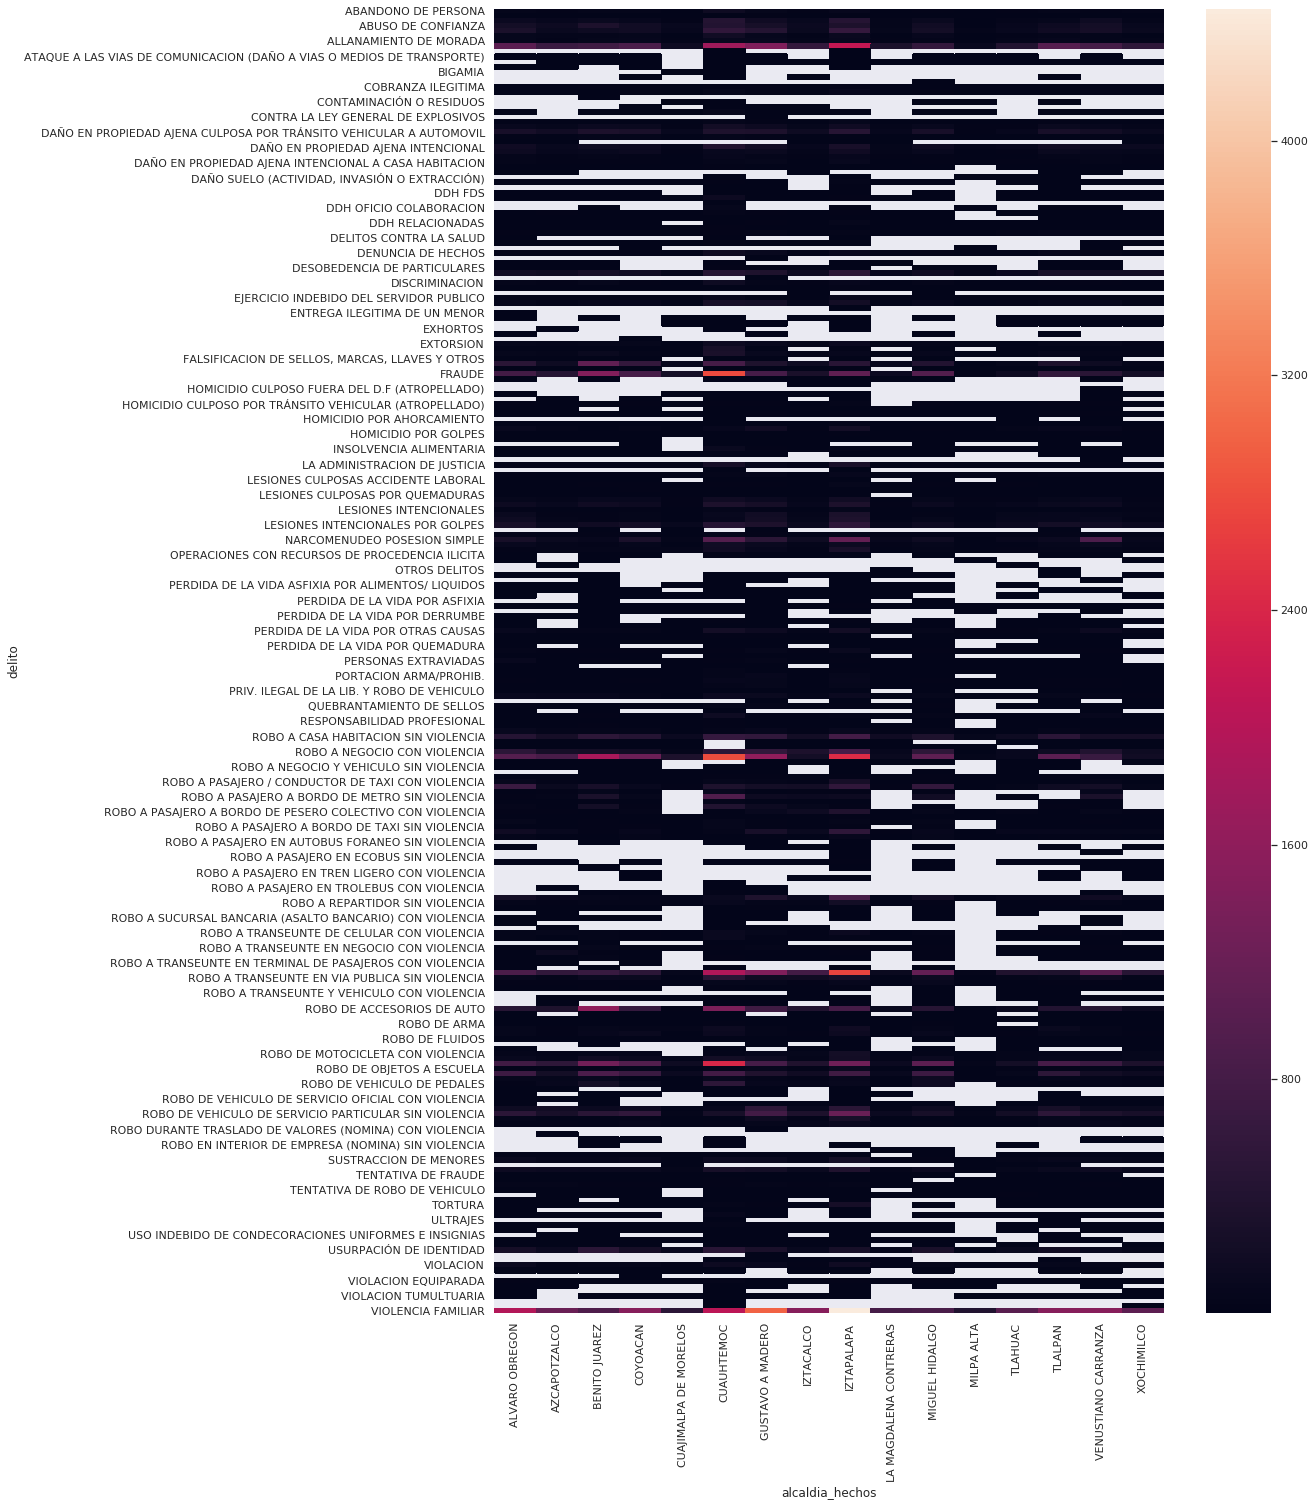

In [548]:
deli = r.pivot('delito','alcaldia_hechos','Num_delitos')
ax = sns.heatmap(deli)

### 9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).
#### - a) Pinta un mapa con este indicador. Describe los resultados.

In [83]:
homicidio_doloso = datos[datos['categoria_delito'] == 'HOMICIDIO DOLOSO']

In [94]:
homicidio_doloso['longitud'] = homicidio_doloso['longitud'].fillna('nan')
homicidio_doloso['latitud'] = homicidio_doloso['latitud'].fillna('nan')
homicidio_doloso = homicidio_doloso[(homicidio_doloso['longitud'] != 'nan') & (homicidio_doloso['latitud'] != 'nan')]

In [85]:
homicidio_doloso.head(2)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,longitud,latitud,geopoint,Fecha_Hechos,anioMes,mes,dia
126,2019.0,Septiembre,2019-09-15 12:24:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE H...,HOM-2,1 CON DETENIDO 1 C/D,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,2019,Septiembre,2019-09-15 12:38:17,CALLE RETEN DE AGUA,-99.108537,19.505676,"19.5056763421,-99.108536657",2019-09-15 12:24:00,2019-09,09,15
144,2019.0,Septiembre,2019-09-15 02:30:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN IZTAPALAPA,IZP-5,UI-3CD,IZTAPALAPA,CERRO DE LA ESTRELLA,2019,Septiembre,2019-09-15 15:11:18,AVENIDA 11,-99.082651,19.327496,"19.3274961997,-99.0826513053",2019-09-15 02:30:00,2019-09,09,15


In [97]:
lats = []
lons = []
for i, item in homicidio_doloso.iterrows():
    lats.append(float(item[15]))
    lons.append(float(item[14]))

In [36]:
state_geo = './data/cdmx.json'

In [226]:
m = folium.Map(location=[19.505676,-99.108537], zoom_start=10)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 fill_color='BuPu',
 fill_opacity=0.3,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
m.add_child(HeatMap(zip(lats, lons), radius = 14))
folium.LayerControl().add_to(m)
m.save('mapaCalor.html')
m

##### La mayoria de los delitos dolosos se da en la parta media y alta de la ciudad de mexico, el norte de la cdmx se da la mayor concentracion de este tipos de delitos:

##### teniendo asi que ,Miguel Hidalgo, Cuautemoc e Iztapalapa cuentan con el mayor indice de delitos dolosos.

### 10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

#### Por colonia el indicador estaría compuesto por:
##### a) La frecuencia delictiva (que tan seguido ocurre un delito),
##### b) nivel del impacto delictivo (delitos que amenaza la integridad fisica de la persona)
##### c) Frecuencia de la hora del dia, y de los dias de la semana

### 11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). 
#### - a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

In [167]:
from sklearn.cluster import DBSCAN

In [185]:
coordenadas = []
for a, b in zip(lats, lons):
    coordenadas.append([b,a])

In [217]:
X = np.array(coordenadas)

In [218]:
ms_per_radian = 6371.0088 * 1000
epsilon = 400 / ms_per_radian

In [219]:
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(X)

In [220]:
labels = db.labels_ 

In [221]:
X = pd.DataFrame(X_principal) 
X.columns = ['longitud', 'latitud'] 

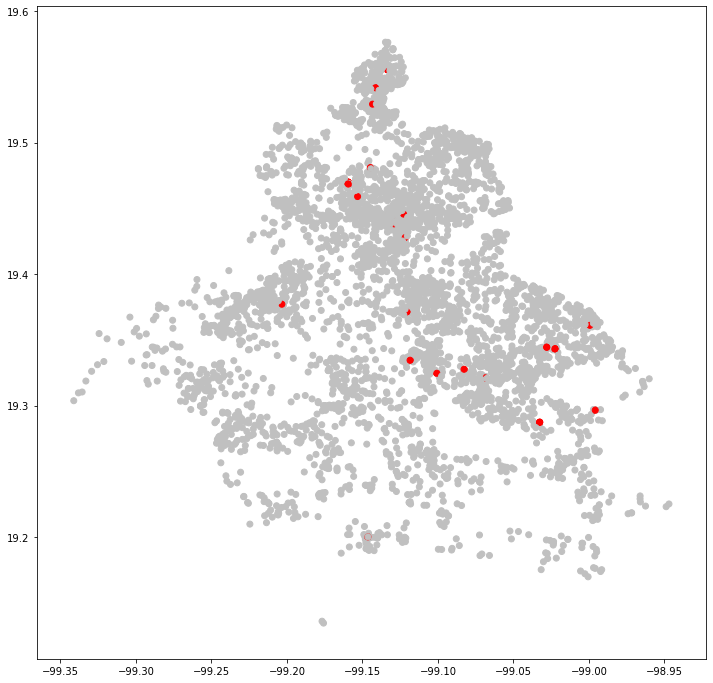

In [222]:
cvec = ['r' if label > -1 else 'silver' for label in labels]

plt.figure(figsize =(12, 12)) 
plt.scatter(X['longitud'], X_principal['latitud'], c = cvec) 
  
plt.show() 

#### Se puede notar que la mayoria de los delitos se concentra en las alcaldias como iztapalapa, cuahtemoc y gustavo a madero

### 12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

In [16]:
import folium
from folium.plugins import MarkerCluster, HeatMap
from folium import IFrame
import geopandas as gpd
from geopandas.tools import sjoin
import shapely
from shapely.geometry import Point, LineString

In [30]:
import random

In [17]:
categorias_robo_transporte = ['ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA']

In [18]:
robo_transporte_publico = df_cdmx.loc[df_cdmx['categoria_delito'].isin(categorias_robo_transporte)]

In [19]:
rutas_transporte = gpd.read_file('./data/rutas-y-corredores-del-transporte-publico-concesionado.csv', sep=',')

In [20]:
rutas_transporte.crs = {'init':'epsg:4326'}

In [21]:
robo_transporte_publico['latitud'] = robo_transporte_publico['latitud'].fillna(0)
robo_transporte_publico['longitud'] = robo_transporte_publico['longitud'].fillna(0)

In [22]:
robo_transporte_publico = robo_transporte_publico[robo_transporte_publico['latitud'] != 0]
robo_transporte_publico = robo_transporte_publico[robo_transporte_publico['longitud'] != 0]

In [23]:
robo_transporte_publico.shape

(1057, 26)

In [124]:
rutas_transporte.head(2)

,Geopoint,Geoshape,ID,Tipo de transporte,Ruta corredor,Detalle,Detalle 2,Descripción,geometry
0,"19.3654538002,-99.1561749483","{""type"": ""LineString"", ""coordinates"": [[-99.17...",1023,RUTAS DE TRANSPORTE,RUTA 2,R-002,Chapultepec Division del Norte Prepa 5,RUTA 2 002 Chapultepec Division del Norte Prepa 5,None
1,"19.3651112046,-99.1625370806","{""type"": ""LineString"", ""coordinates"": [[-99.18...",1050,RUTAS DE TRANSPORTE,RUTA 2,002 MIXCOAC CHARCO AZUL - ERMITA,,RUTA 2 002 MUNICIPIO LIBRE - MIXOCAC Y/O PORTA...,None


In [24]:
def getCoordenadas(coor):
    result = re.search('{"type": "LineString", "coordinates": \[(.*)\]}', coor)
    return result.group(1)

In [25]:
def limpiaCadena1(cadena):
    cadena_limpia = re.sub(r'[,|\[|\]]',r'',cadena)
    return cadena_limpia

In [26]:
def limpiaCadena2(cadena):
    cadena_limpia = re.sub(r',',r' ',cadena)
    return cadena_limpia

In [27]:
def convertir(string): 
    li = list(string.split(" ")) 
    return li 

In [28]:
dic_coordenadas = {}
for i, a in rutas_transporte.iterrows():
    dic_coordenadas[a[7]] = getCoordenadas(a[1])

In [29]:
dicA = {}
for key in dic_coordenadas:
    matches = re.findall(r'\[.+?\]',dic_coordenadas[key])
    listaB = []
    for elem1 in matches:
        listaB.append( [float(convertir(limpiaCadena1(elem1))[1]), float(convertir(limpiaCadena1(elem1))[0])] )
    dicA[key] = listaB

In [31]:
def colorHex():
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    return hex_number

In [55]:
my_map = folium.Map(location=[19.3654538002,-99.1561749483], zoom_start=12)

In [56]:
my_map.choropleth(
 geo_data=state_geo,
 name='choropleth',
 fill_color='#7b68ee',
 fill_opacity=0.2,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(my_map)

In [57]:
for i in range(0,len(robo_transporte_publico)):
    folium.Marker([robo_transporte_publico.iloc[i]['latitud'], robo_transporte_publico.iloc[i]['longitud']], popup=robo_transporte_publico.iloc[i]['calle_hechos']).add_to(my_map)

In [58]:
for key in dicA:
    folium.PolyLine(dicA[key], color=colorHex(), weight=2.5, opacity=1, popup=str(key)).add_to(my_map)

In [59]:
my_map.save('mapaRutas.html')